## Load data

First, we load up a DataFrame.

In [1]:
# We want to use the latest version of Seaborn (0.9.0) but an older version is
# installed on Colab. Run this cell only once to install the right version.
!pip install seaborn==0.9.0

In [0]:
# To keep the page organized do all imports here
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
sns.set()

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Database credentials
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [4]:
students_df = pd.read_sql_table('studentsperformance', con=engine)

# remove the connection
engine.dispose()

students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Before you go on, explore this dataset using the techniques from the previous checkpoint so you understand the basic data schema.


## Understanding distribution with Histograms

The histogram can help us quickly analyze a variable's distribution. Let's see how math, reading, and writing scores are distributed in student performance data.

In [5]:
students_df[['math score', 'writing score', 'reading score']].describe()

,math score,writing score,reading score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,68.054000,69.169000
std,15.16308,15.195657,14.600192
min,0.00000,10.000000,17.000000
25%,57.00000,57.750000,59.000000
50%,66.00000,69.000000,70.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


We can see that math has a mean of 66. Let's do a histogram to visualize this data.

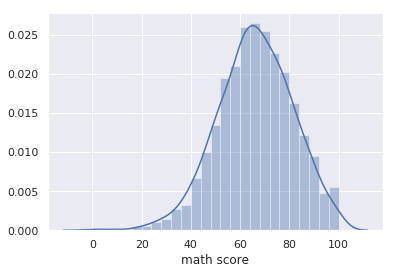

In [6]:
ax = sns.distplot(students_df['math score'])

Seaborn gave us a lot out of the box. The name of the Series was used to create a label for the x-axis. A kernel density estimate was plotted along with the histogram. And the number of bins was estimated automatically using a built in formula. But, we have control over these things if we wish.

`distplot` makes a good guess at the right number of bins to use, but increasing or decreasing the number may reveal features of the data. It may be instructive to experiment by plotting the histogram with a different number of bins.  We could draw a histogram for reading score using 20 bins for instance.


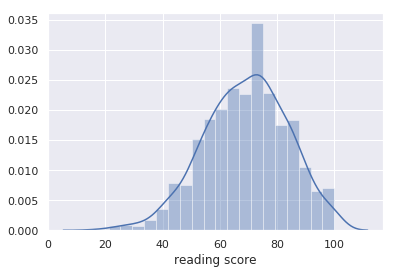

In [7]:
ax = sns.distplot(students_df['reading score'], bins=20)

We can also remove the kde. 

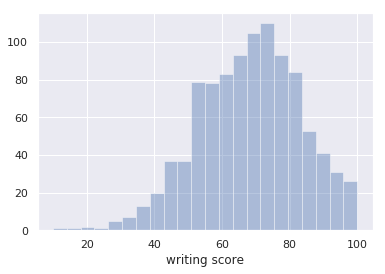

In [8]:
ax = sns.distplot(students_df['writing score'], kde=False)

## Comparing the distribution of two variables

Next, let's visualize the relationship between two variables. Here, what we want is a scatter plot, and for that we'll use  the `scatterplot()` function.  Let's compare math and reading scores:

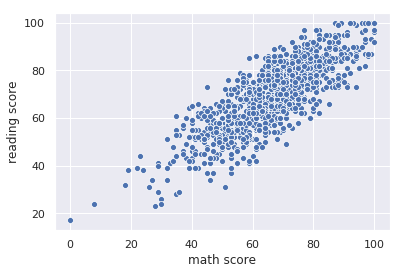

In [9]:
sns.scatterplot(x="math score", y="reading score", data=students_df)

In a scatter plot, one variable is plotted on the x-axis and the other on the y-axis. It may be immediately obvious that as the math score increases, the reading score also increases. One explanation here might be that students who are good at maths are also better at reading, or vice-versa. Or, we might think that what's really at stake is that schools that have high reading scores also tend to have high writing scores, because they have sufficient resources. 

Suppose we wanted to see how this distribution works across a gender variable? We can group the data by gender and generate a scater plot by telling Seaborn which categorical  column to use.


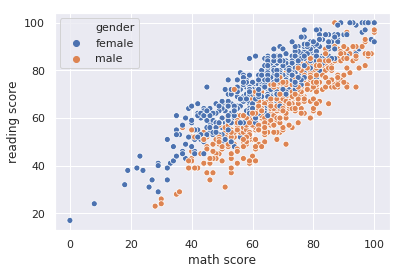

In [10]:
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)

It looks like females are scoring higher in reading than the males. We will further explore this another type of plot shortly.

Does the type of lunch have any effect on the score? It is possible to vary the type of markers as well as the colors used to show grouping by two different variables.

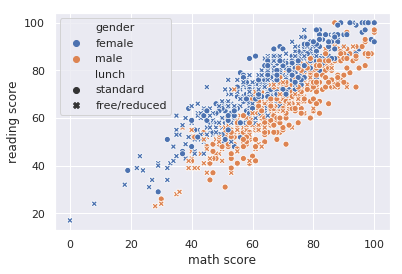

In [11]:
sns.scatterplot(x="math score", y="reading score", hue="gender", style="lunch",  data=students_df)

We could even vary the size of the markers to show another variable. Does completion of the preparation course matter?

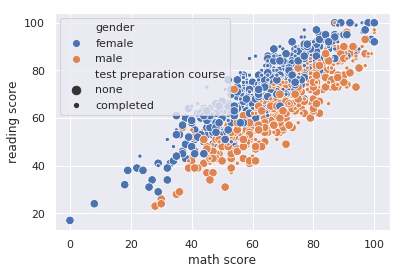

In [12]:
sns.scatterplot(x="math score", y="reading score", hue="gender", size="test preparation course",  data=students_df)

It's possible to combine the histogram and the scatterplot to see both the individual distributions as well as the relative distributions on the same graph.

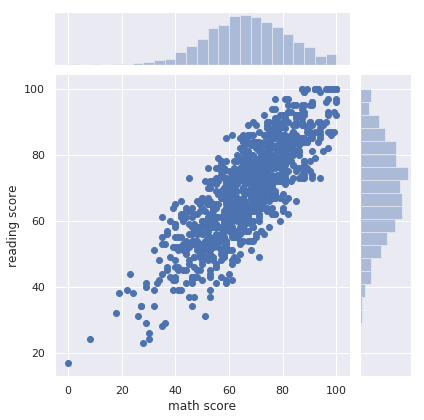

In [13]:
sns.jointplot(x="math score", y="reading score", data=students_df)

To plot multiple distributions in the dataset, use the `pairplot()` function. It will compare all variables against each other in a matrix of plots.

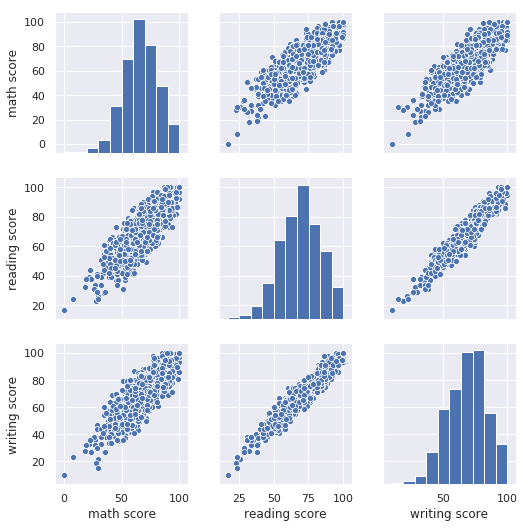

In [14]:
sns.pairplot(students_df)

We can see strong correlations between the three scores.

Next, let's examine distributions with respect to categories. In the scatter plots above, as we added categorical variables, the plots became progressively harder to interpret. Instead, we could use a **Box Plot** to compare these variables by category.

## Box Plots

Box plots visually illustrate the distribution of values in a category. In a box plot, the median and upper and lower quartiles are clearly shown as well as the maximum and minimum. Two or more samples may be compared using the boxplot.

![](assets/python4_visualizations_01.png)

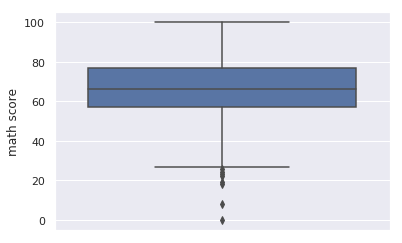

In [15]:
sns.boxplot(y="math score", data=students_df)

How are math scores distributed across genders?

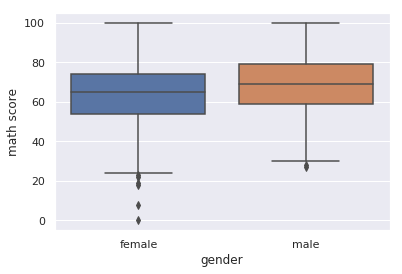

In [16]:
sns.boxplot(y="math score", x="gender", data=students_df)

How are maths scores affected by parents education and gender? To properly display the labels on the x axis we will have to rotate them.

[Text(0, 0, "bachelor's degree"),
 Text(0, 0, 'some college'),
 Text(0, 0, "master's degree"),
 Text(0, 0, "associate's degree"),
 Text(0, 0, 'high school'),
 Text(0, 0, 'some high school')]

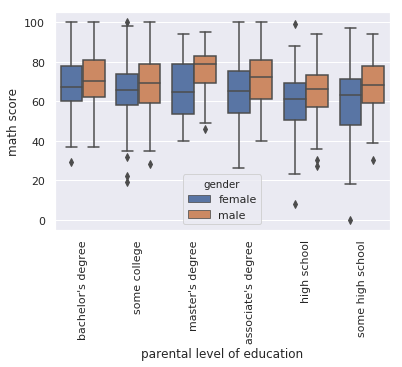

In [17]:
ax = sns.boxplot(y="math score", hue="gender", x = "parental level of education", data=students_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

With the box plot, it's easier to compare the means of the various categories, and the range of values. There doesn't seem to be any significant difference in parental level of education. Maybe the preparation course makes a difference? Let's look at that variable. If you want to see the gender, lunch, and test preparation course variables in one plot, then a `catplot` might be a good choice.

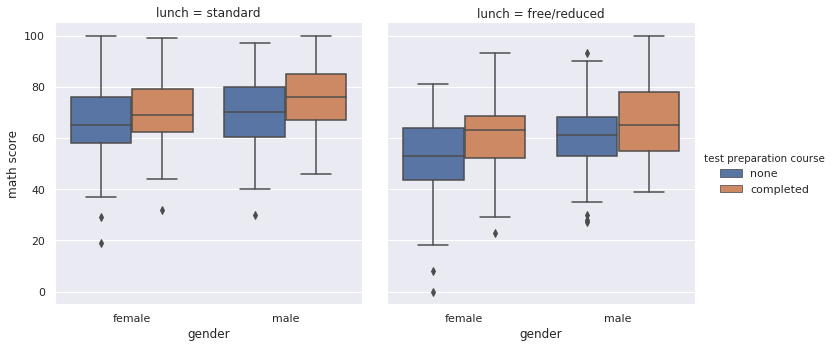

In [18]:
sns.catplot(y="math score", x="gender", hue = "test preparation course", col="lunch",
            kind="box", data=students_df)

Now we get some interesting results. Clearly the students that completed the test preparation course scored higher than those that did not. There also seems to be a small advantage to the standard lunch over the reduced lunch.